***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [6]:
import pandas as pd
import numpy as np

!pip install seaborn==0.11.2


import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [7]:
dataset = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [8]:
dataset.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [9]:
dataset.Renda.max()

200000

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [10]:
faixa_salarial = np.array( [0, 1576, 3940, 11820, 19700, 200000] )

### 2º Definir os labels das classes

In [11]:
classe_salarial = np.array( ['E', 'D', 'C', 'B', 'A'] )

### 3º Construir a coluna de frequências

In [12]:
frequencia = pd.value_counts (
                        pd.cut( x = dataset.Renda,
                                bins = faixa_salarial,
                                labels = classe_salarial,
                                include_lowest = True
                              )
            )
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [13]:
percentual = pd.value_counts (
                        pd.cut( x = dataset.Renda,
                                bins = faixa_salarial,
                                labels = classe_salarial,
                                include_lowest = True
                              ),
                        normalize = True
            ) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [14]:
#d = np.array([faixa_salarial, frequencia, percentual])
#colunas = ['Faixa_Salarial', 'Frequencia', 'Percentual' ]

dist_renda = pd.DataFrame( { 'Frequencia': frequencia, 'Percentual %': percentual})
#dist_renda.sort_index(ascending = False, inplace = True)
dist_renda

,Frequencia,Percentual %
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

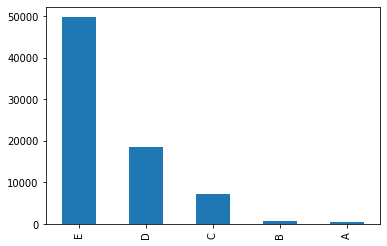

In [15]:
#dist_renda.plot.bar(subplots = True, rot = 0)
dist_renda['Frequencia'].plot.bar()

> ### Conclusões

Nessa primeira analise só deu para perceber a distriibuição da renda.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [16]:
dataset.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Histogramas

### Histograma Idade

C:\Users\anderson.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


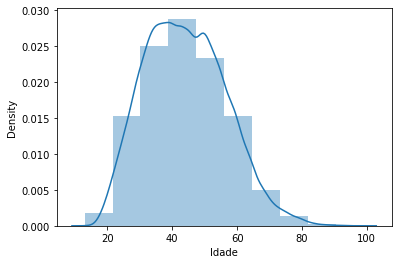

In [55]:
sns.distplot(dataset.Idade, bins = 10)

In [58]:
media_anos_vida = dataset.Idade.mean()
moda_anos_vida = dataset.Idade.mode()
mediana_anos_vida = dataset.Idade.median()
print(' Moda -> {}\n Mediana -> {}\n Media -> {}\n'.format(moda_anos_vida[0], mediana_anos_vida, round(media_anos_vida,2)))
print('Moda < Mediana < Media => {}'.format('Assimetrica a Direita'))

 Moda -> 40
 Mediana -> 43.0
 Media -> 44.07

Moda < Mediana < Media => Assimetrica a Direita


### Histograma Altura

C:\Users\anderson.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


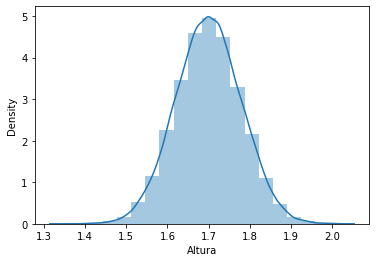

In [19]:
sns.distplot(dataset.Altura, bins = 20)

In [20]:
media_altura = dataset.Altura.mean()
moda_altura = dataset.Altura.mode()
mediana_altura = dataset.Altura.median()
print(' Moda -> {}\n Mediana -> {}\n Media -> {}\n'.format(moda_altura[0], mediana_altura, media_altura))
print('Distribuição bem centralizada == Simetrica')

 Moda -> 1.56812756
 Mediana -> 1.6993247325
 Media -> 1.6995124540575814

Distribuição bem centralizada == Simetrica


### Histograma de Renda

C:\Users\anderson.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


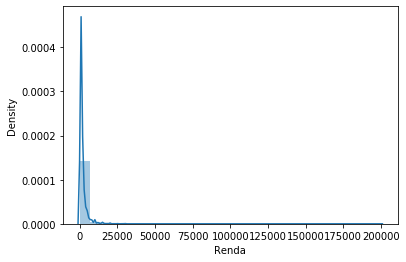

In [21]:
sns.distplot(dataset.Renda, bins = 30)

In [22]:
media_renda = dataset.Renda.mean()
moda_renda = dataset.Renda.mode()
mediana_renda = dataset.Renda.median()
print(' Moda -> {}\n Mediana -> {}\n Media -> {}\n'.format(moda_renda[0], mediana_renda, media_renda))
print('Moda < Mediana < Media => {}'.format('Assimetrica a Direita'))

 Moda -> 788
 Mediana -> 1200.0
 Media -> 2000.3831988547631

Moda < Mediana < Media => Assimetrica a Direita


#### > ### Conclusões

Descoberta da simetria dos dados

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\anderson.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


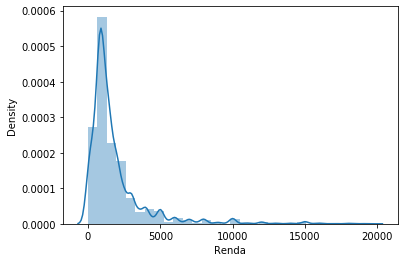

In [23]:
sns.distplot(dataset.query('Renda < 20000').Renda, bins = 30)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [24]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [25]:
freq_sexo_cor = pd.crosstab(dataset.Sexo, dataset.Cor)
freq_sexo_cor.rename(index= sexo, inplace = True)
freq_sexo_cor.rename(columns = cor, inplace = True)
freq_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [26]:
perc_sexo_cor = pd.crosstab(dataset.Sexo, dataset.Cor, normalize = True) * 100
perc_sexo_cor.rename(index= sexo, inplace = True)
perc_sexo_cor.rename(columns = cor, inplace = True)
perc_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [27]:
dataset.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [28]:
dataset.Renda.median()

1200.0

### Obtenha a moda

In [29]:
dataset.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [30]:
dataset.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [31]:
dataset.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [32]:
dataset.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [59]:
sexo_cor = pd.crosstab(dataset.Cor,
                             dataset.Sexo,
                             values = dataset.Renda,
                             aggfunc = { 'mean', 'median', 'max' }
                            )
sexo_cor.rename(index = cor, inplace = True)
sexo_cor.rename(columns = sexo, inplace = True)
sexo_cor

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

In [33]:
media_sexo_cor = pd.crosstab(dataset.Sexo,
                             dataset.Cor,
                             values = dataset.Renda,
                             aggfunc = 'mean'
                            )
media_sexo_cor.rename(index = sexo, inplace = True)
media_sexo_cor.rename(columns = cor, inplace = True)
media_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


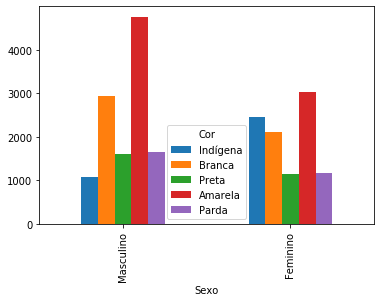

In [34]:
media_sexo_cor.plot.bar()

In [35]:
mediana_sexo_cor = pd.crosstab(dataset.Sexo,
                             dataset.Cor,
                             values = dataset.Renda,
                             aggfunc = 'median'
                              )
mediana_sexo_cor.rename(index = sexo, inplace = True)
mediana_sexo_cor.rename(columns = cor, inplace = True)
mediana_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


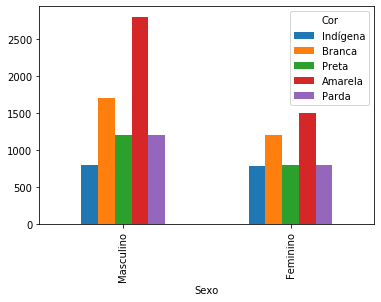

In [36]:
mediana_sexo_cor.plot.bar()

In [37]:
max_sexo_cor = pd.crosstab(dataset.Sexo,
                             dataset.Cor,
                             values = dataset.Renda,
                             aggfunc = 'max'
                              )
max_sexo_cor.rename(index = sexo, inplace = True)
max_sexo_cor.rename(columns = cor, inplace = True)
max_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


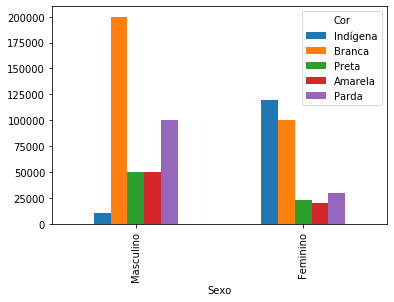

In [38]:
max_sexo_cor.plot.bar()

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [61]:
disp_sexo_cor = pd.crosstab(dataset.Cor,
                             dataset.Sexo,
                             values = dataset.Renda,
                             aggfunc = {'mad', 'var', 'std'}
                              )
disp_sexo_cor.rename(index = cor, inplace = True)
disp_sexo_cor.rename(columns = sexo, inplace = True)
disp_sexo_cor

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

In [39]:
mad_sexo_cor = pd.crosstab(dataset.Sexo,
                             dataset.Cor,
                             values = dataset.Renda,
                             aggfunc = 'mad'
                              )
mad_sexo_cor.rename(index = sexo, inplace = True)
mad_sexo_cor.rename(columns = cor, inplace = True)
mad_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,798.910889,2261.012346,975.602482,3709.597211,1125.827704
Feminino,3007.892952,1670.967106,705.453357,2549.146322,811.580946


In [40]:
var_sexo_cor = pd.crosstab(dataset.Sexo,
                             dataset.Cor,
                             values = dataset.Renda,
                             aggfunc = 'var'
                              )
var_sexo_cor.rename(index = sexo, inplace = True)
var_sexo_cor.rename(columns = cor, inplace = True)
var_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [41]:
std_sexo_cor = pd.crosstab(dataset.Sexo,
                             dataset.Cor,
                             values = dataset.Renda,
                             aggfunc = 'std'
                              )
std_sexo_cor.rename(index = sexo, inplace = True)
std_sexo_cor.rename(columns = cor, inplace = True)
std_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0.5, 0, 'R$')

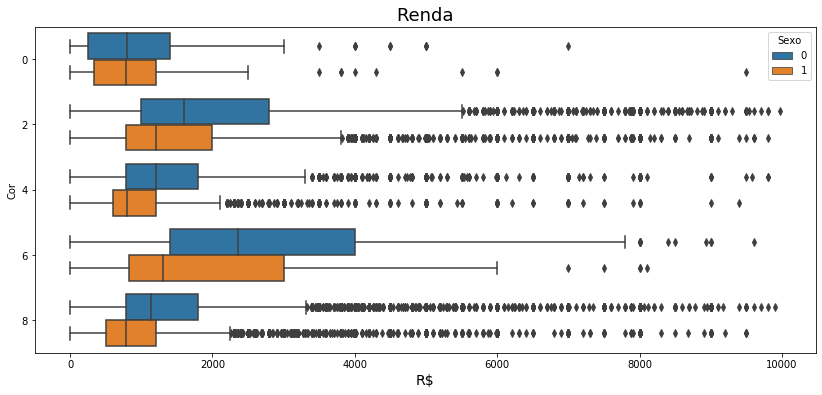

In [42]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue= 'Sexo', data = dataset.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [62]:
from scipy import stats
# Menor ou Igual 
stats.percentileofscore(dataset.Renda, 788.00, kind='weak')

28.86777719937533

In [63]:
#Valor igual ao procurado - 788
stats.percentileofscore(dataset.Renda, 788.00, kind='rank')

24.390942217595004

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [44]:
#Construção de Centis
dataset.Renda.quantile([i / 100 for i in range(1,100)])

# Valor máximo 15 mil

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
0.06      180.0
0.07      200.0
0.08      280.0
0.09      300.0
0.10      350.0
0.11      400.0
0.12      400.0
0.13      480.0
0.14      500.0
0.15      500.0
0.16      600.0
0.17      600.0
0.18      700.0
0.19      700.0
0.20      788.0
0.21      788.0
0.22      788.0
0.23      788.0
0.24      788.0
0.25      788.0
0.26      788.0
0.27      788.0
0.28      788.0
0.29      789.0
0.30      800.0
         ...   
0.70     1900.0
0.71     2000.0
0.72     2000.0
0.73     2000.0
0.74     2000.0
0.75     2000.0
0.76     2000.0
0.77     2200.0
0.78     2300.0
0.79     2400.0
0.80     2500.0
0.81     2500.0
0.82     2600.0
0.83     3000.0
0.84     3000.0
0.85     3000.0
0.86     3000.0
0.87     3400.0
0.88     3500.0
0.89     4000.0
0.90     4000.0
0.91     4200.0
0.92     5000.0
0.93     5000.0
0.94     5400.0
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99,

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [64]:
renda_anos_estudo = pd.crosstab( dataset['Anos de Estudo'],
                                     dataset.Sexo,
                                     values = dataset.Renda,
                                     aggfunc = ['mean', 'median', 'max', 'std']
                                      )
renda_anos_estudo.rename(columns = sexo, inplace = True)
renda_anos_estudo

mean                 median                max  \
Sexo              Masculino     Feminino Masculino Feminino Masculino   
Anos de Estudo                                                          
1                799.494638   516.201748       700      390     30000   
2                895.629047   492.771987       788      400     30000   
3                931.178986   529.911638       788      450     40000   
4               1109.203862   546.853916       800      500     80000   
5               1302.329283   704.279111      1000      788     50000   
6               1338.653218   781.389776      1045      788     35000   
7               1448.875419   833.732824      1200      788     25000   
8               1465.497940   830.751004      1200      788     40000   
9               1639.396667   933.615351      1300      800     30000   
10              1508.038850   868.021700      1200      788     60000   
11              1731.270847   925.919225      1218      800     45000   
12              2117.060504  1286.790889      1500     1000    200000   
13              2470.330776  1682.313725      1800     1200     30000   
14              3195.099154  1911.730047      2400     1300     25000   
15              3706.620269  2226.460457      2500     1600     50000   
16              6134.279790  3899.513231      4000     2800    200000   
17              1295.761905   798.174419      1200      788      7000   

                                 std               
Sexo           Feminino    Masculino     Feminino  
Anos de Estudo                                     
1                 10000  1023.904884   639.311534  
2                  2000  1331.950552   425.291842  
3                  4000  1435.173827   498.234168  
4                  3500  2143.800133   424.124446  
5                 10000  1419.821787   629.553397  
6                  8000  1484.650587   635.782641  
7                  6000  1476.628602   574.547028  
8                  9000  1419.708673   602.038029  
9                 18000  1515.583715   896.781213  
10                20000  2137.664774   973.221652  
11                 6000  2078.609734   620.611907  
12               100000  2676.538942  1819.040417  
13               120000  2268.081538  4851.833513  
14                20000  2797.116800  2053.789771  
15                20000  3987.214974  2064.083336  
16               100000  7447.613594  4212.770709  
17                 3000   979.648745   459.985964

In [45]:
media_renda_anos_estudo = pd.crosstab( dataset['Anos de Estudo'],
                                     dataset.Sexo,
                                     values = dataset.Renda,
                                     aggfunc = 'mean'
                                      )
media_renda_anos_estudo.rename(columns = sexo, inplace = True)
media_renda_anos_estudo

Sexo,Masculino,Feminino
Anos de Estudo,,
1,799.494638,516.201748
2,895.629047,492.771987
3,931.178986,529.911638
4,1109.203862,546.853916
5,1302.329283,704.279111
6,1338.653218,781.389776
7,1448.875419,833.732824
8,1465.497940,830.751004
9,1639.396667,933.615351


In [46]:
mediana_renda_anos_estudo = pd.crosstab( dataset['Anos de Estudo'],
                                     dataset.Sexo,
                                     values = dataset.Renda,
                                     aggfunc = 'median'
                                      )
mediana_renda_anos_estudo.rename(columns = sexo, inplace = True)
mediana_renda_anos_estudo

Sexo,Masculino,Feminino
Anos de Estudo,,
1,700,390
2,788,400
3,788,450
4,800,500
5,1000,788
6,1045,788
7,1200,788
8,1200,788
9,1300,800


In [47]:
max_renda_anos_estudo = pd.crosstab( dataset['Anos de Estudo'],
                                     dataset.Sexo,
                                     values = dataset.Renda,
                                     aggfunc = 'max'
                                      )
max_renda_anos_estudo.rename(columns = sexo, inplace = True)
max_renda_anos_estudo

Sexo,Masculino,Feminino
Anos de Estudo,,
1,30000,10000
2,30000,2000
3,40000,4000
4,80000,3500
5,50000,10000
6,35000,8000
7,25000,6000
8,40000,9000
9,30000,18000


In [48]:
desvio_padrao_renda_anos_estudo = pd.crosstab( dataset['Anos de Estudo'],
                                     dataset.Sexo,
                                     values = dataset.Renda,
                                     aggfunc = 'std'
                                      )
desvio_padrao_renda_anos_estudo.rename(columns = sexo, inplace = True)
desvio_padrao_renda_anos_estudo

Sexo,Masculino,Feminino
Anos de Estudo,,
1,1023.904884,639.311534
2,1331.950552,425.291842
3,1435.173827,498.234168
4,2143.800133,424.124446
5,1419.821787,629.553397
6,1484.650587,635.782641
7,1476.628602,574.547028
8,1419.708673,602.038029
9,1515.583715,896.781213


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0.5, 0, 'R$')

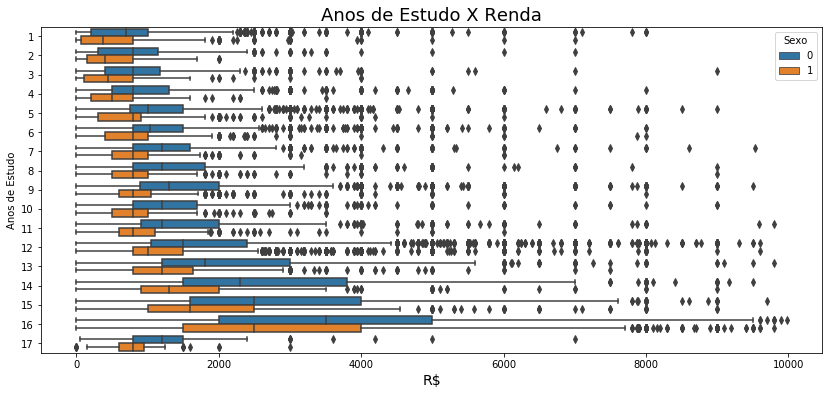

In [49]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue= 'Sexo', data = dataset.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('Anos de Estudo X Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

> ### Conclusões

QUanto Maior o tempo de estudo, mais descrepante é a diferença salarial entre homem e mulher

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [50]:
df_uf = dataset.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
df_uf.rename(index = uf, inplace = True)
df_uf.rename(columns = {'mean':'Media', 'median': 'Mediana', 'max':'Maximo', 'std':'Desvio_Padrao'}, inplace = True)
df_uf

Renda                              
                           Media Mediana  Maximo Desvio_Padrao
UF                                                            
Rondônia             1789.761223    1200   50000   2406.161161
Acre                 1506.091782     900   30000   2276.233415
Amazonas             1445.130100     900   22000   1757.935591
Roraima              1783.588889    1000   20000   2079.659238
Pará                 1399.076871     850   50000   2053.779555
Amapá                1861.353516    1200   15580   2020.688632
Tocantins            1771.094946    1000   60000   2934.590741
Maranhão             1019.432009     700   30000   1887.816905
Piauí                1074.550784     750   40000   2373.355726
Ceará                1255.403692     789   25000   1821.963536
Rio Grande do Norte  1344.721480     800   15500   1651.805500
Paraíba              1293.370487     788   30000   1950.272431
Pernambuco           1527.079319     900   50000   2389.622497
Alagoas              1144.552602     788   11000   1237.856197
Sergipe              1109.111111     788   16000   1478.997878
Bahia                1429.645094     800  200000   3507.917248
Minas Gerais         2056.432084    1200  100000   3584.721547
Espírito Santo       2026.383852    1274  100000   3513.846868
Rio de Janeiro       2496.403168    1400  200000   5214.583518
São Paulo            2638.104986    1600   80000   3503.777366
Paraná               2493.870753    1500  200000   4302.937995
Santa Catarina       2470.854945    1800   80000   3137.651112
Rio Grande do Sul    2315.158336    1500   35000   2913.335783
Mato Grosso do Sul   2262.604167    1500   42000   3031.419122
Mato Grosso          2130.652778    1500   35000   2542.630178
Goiás                1994.580794    1500   30000   2221.933065
Distrito Federal     4241.954722    2000  100000   5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

Text(0.5, 0, 'R$')

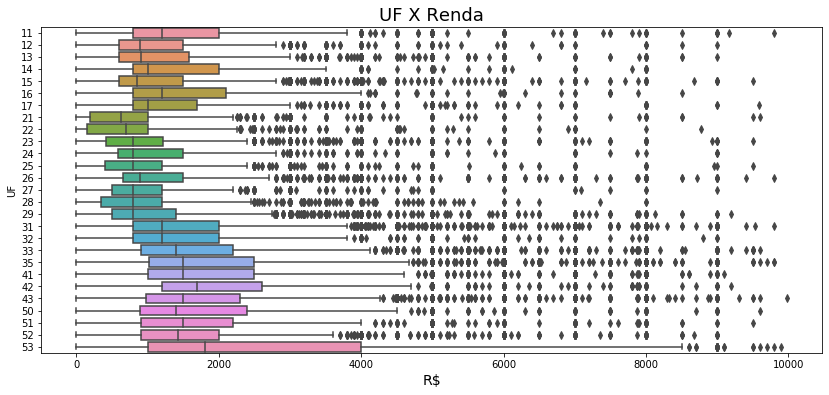

In [51]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dataset.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('UF X Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

> ### Conclusões

DF deixa qualquer estado da federação paa trás no quesito Renda.